In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [75]:
df = pd.read_csv("C:\\Users\\Aditya\\OneDrive - Manipal Academy of Higher Education\\Desktop\\MIT\\Basic-Regression\\kc_data.csv")

In [76]:
print(df.head())

           id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  20141013T000000         3       1.00         1180      5650   
1  6414100192  20141209T000000         3       2.25         2570      7242   
2  5631500400  20150225T000000         2       1.00          770     10000   
3  2487200875  20141209T000000         4       3.00         1960      5000   
4  1954400510  20150218T000000         3       2.00         1680      8080   

   floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0     1.0           0     0          3  ...        1180              0   
1     2.0           0     0          3  ...        2170            400   
2     1.0           0     0          3  ...         770              0   
3     1.0           0     0          5  ...        1050            910   
4     1.0           0     0          3  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955    

In [77]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [78]:
print(df.describe())


                 id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   4.580302e+09      3.370842      2.114757   2079.899736  1.510697e+04   
std    2.876566e+09      0.930062      0.770163    918.440897  4.142051e+04   
min    1.000102e+06      0.000000      0.000000    290.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1427.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068800e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [79]:
correlation_matrix = df.corr()

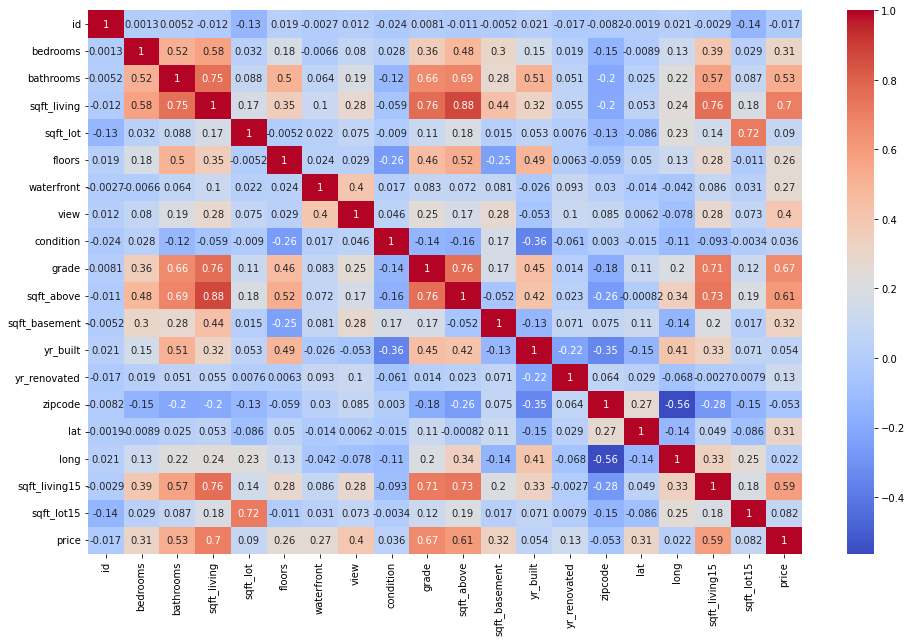

In [80]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [81]:
columns_to_drop = ['id', 'sqft_living', 'waterfront', 'condition','lat','long','zipcode','yr_renovated']
df.drop(columns_to_drop, axis=1, inplace=True)

In [82]:
df.head()

,date,bedrooms,bathrooms,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
0,20141013T000000,3,1.00,5650,1.0,0,7,1180,0,1955,1340,5650,221900.0
1,20141209T000000,3,2.25,7242,2.0,0,7,2170,400,1951,1690,7639,538000.0
2,20150225T000000,2,1.00,10000,1.0,0,6,770,0,1933,2720,8062,180000.0
3,20141209T000000,4,3.00,5000,1.0,0,7,1050,910,1965,1360,5000,604000.0
4,20150218T000000,3,2.00,8080,1.0,0,8,1680,0,1987,1800,7503,510000.0


In [83]:
columns_to_drop = ['date']
df.drop(columns_to_drop, axis=1, inplace=True)

In [84]:
df["sqft_above"].fillna(df["sqft_above"].mean(),inplace=True)

In [85]:
df.head()

,bedrooms,bathrooms,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
0,3,1.00,5650,1.0,0,7,1180,0,1955,1340,5650,221900.0
1,3,2.25,7242,2.0,0,7,2170,400,1951,1690,7639,538000.0
2,2,1.00,10000,1.0,0,6,770,0,1933,2720,8062,180000.0
3,4,3.00,5000,1.0,0,7,1050,910,1965,1360,5000,604000.0
4,3,2.00,8080,1.0,0,8,1680,0,1987,1800,7503,510000.0


In [86]:
feature_names = df.columns.tolist()
feature_names.remove('price')
X = df[feature_names]
Y = df['price']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = model.predict(X_test)

In [94]:
r2 = r2_score(y_test,y_pred)
print("r2 : ",r2)

r2 :  0.6310569753484381


In [91]:
###################################-----Polynomial Regression----------##############################